In [86]:
# Importing libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install seaborn
import seaborn as sb
# !pip install statsmodels
import statsmodels.api as sm
# !pip install sklearn
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression

### Question 1: Statistical learning

### Question 2: MACHINE LEARNING

### Question 3

In [87]:
# LOADING IN THE DIABETES DATA
diaData = pd.read_excel('Diabetes_Data.xlsx')
x = diaData.iloc[:, 0:10]    # Selecting ten variables except the last
corrExplanatory = x.corr()   # Producing a correlation coefficient matrix of predicto variables (x)
corrExplanatory

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


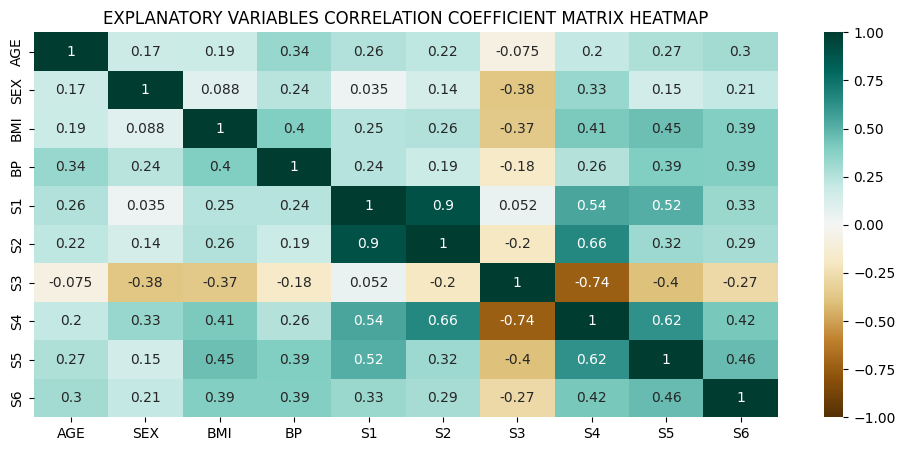

In [88]:
# Making a heatmap of the matrix using heatmap() from seaborn library
plt.rcParams['figure.figsize'] = (12, 5)
xHeatMap = sb.heatmap(corrExplanatory, vmin = -1, vmax = 1, cmap = 'BrBG', annot = True)  
plt.title('EXPLANATORY VARIABLES CORRELATION COEFFICIENT MATRIX HEATMAP')
plt.show()

In [89]:
# CREATING A MULTIVARIATE LINEAR MODEL USING ALL TEN VARIABLES AND A CONSTANT WITH fit()
x = diaData.iloc[:, 0:10]                # Selecting ten variables except the last
xConstant = sm.add_constant(x)           # Adding a constant
y = diaData['Y']                         # Selecting the y 

model1 = sm.OLS(y, xConstant).fit()      # Creating a model and fitting it
diaPredict = model1.predict(xConstant)   # Asking model1 for some predictions

print(model1.summary())                  # Printing the statistics of the model in summary

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           3.83e-62
Time:                        19:34:04   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -334.5671     67.455     -4.960      0.0

In [90]:
# THE MEAN SQUARED ERROR AND ADJUSTED R2 FOR THE MODEL - Python: OLS() - using mean_squared_error from sklearn.metrics
mse = mean_squared_error(y, diaPredict)
print('The mean squared error for the model1 is: ', mse)

The mean squared error for the model1 is:  2859.6963475867506


In [91]:
# CALCULATING R SQUARED AND ADJUSTED R SQUARED: THEY CAN ALSO BE INFERED FROM THE OLS MODEL SUMMARY
# https://www.statology.org/adjusted-r-squared-in-python/
rSquared = r2_score(y, diaPredict)      # R SQUARED - THE SAME VALUE AS GIVEN IN THE OLS SUMMARY TABLE ABOVE
adjRSquared = model1.rsquared_adj       # ADJUSTED R SQUARED - THE SAME VALUE AS GIVEN IN THE OLS SUMMARY TABLE ABOVE

print("R squared is", rSquared)
print("Adjusted R squared is", adjRSquared)

R squared is 0.5177484222203498
Adjusted R squared is 0.5065592904853231


In [92]:
# COMPOSING A MODEL USING FORWARD SELECTION - forward_regression ()
# THE FORWARD STEPWISE REGRESSION - SELECTING PREDICTORS USING ORDINARY LEAST SQUARES
def forwardRegression(X, y, thresholdToBeIn, verbose = True):
    initList = []
    incluList = list(initList)
    
    modelNew = sm.OLS(X,y)
    
    # Checking variables to be included
    while True:
        changed = False                                                  # Check if we can go to the next variable
        excluList = list(set(X.columns) - set(incluList))                # Taking all columns and remove those in inclusion list
        print(excluList)
        currPValue = pd.Series(index = excluList, dtype='float64')       # List for holding p-values
        
        for colNew in excluList:
            modelNew = sm.OLS(y, sm.add_constant(pd.DataFrame(X[incluList + [colNew]]))).fit()
            currPValue[colNew] = modelNew.pvalues[colNew]
            
        bestPValue = currPValue.min()             # Setting the lowest p-value
        
        if bestPValue < thresholdToBeIn:          # Checking if the p-value is less than 0.05
            bestPredictor = currPValue.idxmin()   # Selecting predictor with minimum value of p-value
            incluList.append(bestPredictor)       # Add it to the list of useful predictors
            changed = True                        # Go to the next predictor to be checked
            
            if verbose:
                print('{:5} with p-value {:.4} is selected \n\n'.format(bestPredictor, bestPValue))  # Displaying real-time process message
                print(incluList)
                
        if not changed:                           # When no predictor with p-value < 0.05, stop the process
            break

    return incluList                              # Returning the list of the useful predictors

bestVars = forwardRegression(x, y, 0.05)

print(f'\nSelected variables to be used now are : { bestVars }')

['S4', 'BMI', 'SEX', 'S5', 'BP', 'S3', 'S6', 'S1', 'AGE', 'S2']
BMI   with p-value 3.466e-42 is selected 


['BMI']
['S4', 'SEX', 'S5', 'BP', 'S3', 'S6', 'S1', 'AGE', 'S2']
S5    with p-value 3.04e-20 is selected 


['BMI', 'S5']
['SEX', 'S2', 'BP', 'S3', 'S6', 'S4', 'AGE', 'S1']
BP    with p-value 3.743e-05 is selected 


['BMI', 'S5', 'BP']
['S4', 'SEX', 'S3', 'S6', 'S1', 'AGE', 'S2']
S1    with p-value 0.001454 is selected 


['BMI', 'S5', 'BP', 'S1']
['SEX', 'S3', 'S6', 'S4', 'AGE', 'S2']
SEX   with p-value 0.009231 is selected 


['BMI', 'S5', 'BP', 'S1', 'SEX']
['S3', 'S6', 'S4', 'AGE', 'S2']
S2    with p-value 0.0002723 is selected 


['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']
['AGE', 'S3', 'S6', 'S4']

Selected variables to be used now are : ['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']


In [93]:
# BUILDING A NEW MODEL WITH SELECTED VARIABLES
xSelected= diaData[['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']]
y = diaData['Y']
xWithConstant = sm.add_constant(xSelected)
modelSelected = sm.OLS(y, xWithConstant).fit()
predSelected = modelSelected.predict(xWithConstant)

print(modelSelected.summary())
rSquaredNew = r2_score(y, predSelected)
mse = mean_squared_error(predSelected, y)
print('\n\nThe mean squared error for the selected model is: ', mse)
print('\n\nThe R squared for the selected model is: ', rSquaredNew)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     76.95
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           3.01e-65
Time:                        19:34:05   Log-Likelihood:                -2387.3
No. Observations:                 442   AIC:                             4789.
Df Residuals:                     435   BIC:                             4817.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -313.7666     25.385    -12.360      0.0

### Question 4

In [94]:
# READING THE DATA AND SELECTING SURVIVED PEOPLE COLUMNS
titanic = pd.read_csv('titanic3.csv')
survivors = pd.DataFrame(titanic['survived'])

survivedSum = survivors.sum()                                     # Adding the column values - sum of surivors - only ones count
probab = survivedSum / len(titanic)                               # Calculating the probability

print('The probability of surviving titanic is', probab[0])

The probability of surviving titanic is 0.3819709702062643


In [95]:
# Survival probabilities broken down by passenger class, sex and age. 
# Group the ages into classes and the interval width is not restricted.
pClassOne = titanic[titanic['pclass'] == 1]
pClassTwo = titanic[titanic['pclass'] == 2]
pClassThree = titanic[titanic['pclass'] == 3]
titanicMale = titanic[titanic['sex'] == 'male']
titanicFemale = titanic[titanic['sex'] == 'female']
titanicChild = titanic[titanic['age'] < 18]
titanicAdults = titanic[(titanic['age'] >= 18) & (titanic['age'] > 40)]
titanicOld = titanic[titanic['age'] >= 40]

SurvpClassOne = pClassOne[pClassOne['survived'] == 1]                      # TOTAL SURVIVORS - CLASS ONE
probPClassOne = len(SurvpClassOne) / len(pClassOne['survived'])            # PROBABILITY TO SURVIVE - CLASS ONE

SurvpClassTwo = pClassTwo[pClassTwo['survived'] == 1]                      # TOTAL SURVIVORS - CLASS TWO
probPClassTwo = len(SurvpClassTwo) / len(pClassTwo['survived'])            # PROBABILITY TO SURVIVE - CLASS TWO

SurvpClassThree = pClassThree[pClassThree['survived'] == 1]                # TOTAL SURVIVORS - CLASS THREE
probPClassThree = len(SurvpClassThree) / len(pClassThree['survived'])      # PROBABILITY TO SURVIVE - CLASS THREE

SurvMale = titanicMale[titanicMale['survived'] == 1]                       # TOTAL SURVIVORS - MALE
probMale = len(SurvMale) / len(titanicMale['survived'])                    # PROBABILITY TO SURVIVE - MALE

SurvFemale = titanicFemale[titanicFemale['survived'] == 1]                 # TOTAL SURVIVORS - FEMALE
probFemale = len(SurvFemale) / len(titanicFemale['survived'])              # PROBABILITY TO SURVIVE - FEMALE

SurvChild = titanicChild[titanicChild['survived'] == 1]                    # TOTAL SURVIVORS - CHILDREN
probChild = len(SurvChild) / len(titanicChild['survived'])                 # PROBABILITY TO SURVIVE - CHILDREN

SurvAdults = titanicAdults[titanicAdults['survived'] == 1]                 # TOTAL SURVIVORS - ADULTS
probAdults = len(SurvAdults) / len(titanicAdults['survived'])              # PROBABILITY TO SURVIVE - CLASS ADULTS

SurvOld = titanicOld[titanicOld['survived'] == 1]                          # TOTAL SURVIVORS - OLD
probOld = len(SurvOld) / len(titanicOld['survived'])                       # PROBABILITY TO SURVIVE - OLD

probabs = pd.DataFrame({'SURVIVAL PROBABILITIES BY GROUPS TABLE': [probPClassOne, probPClassTwo, probPClassThree, probMale, probFemale, probAdults, probChild, probOld]}, 
                 index = ['CLASS ONE', 'CLASS TWO','CLASS THREE', 'MALE', 'FEMALE', 'CHILDREN','ADULTS', 'OLD'])

# Displaying the table
display(probabs)

,SURVIVAL PROBABILITIES BY GROUPS TABLE
CLASS ONE,0.619195
CLASS TWO,0.429603
CLASS THREE,0.255289
MALE,0.190985
FEMALE,0.727468
CHILDREN,0.396476
ADULTS,0.525974
OLD,0.391837


In [96]:
# FILLING NAN VALUES WITH THE MEAN FOR AGE
meanAge = titanic['age'].mean()                  # CALCULATING THE MEAN AGE
titanicNoNaN = titanic.fillna(meanAge)           # FILLING NAN VALUES - BCZ ONLY AGE COLUMN HAS NANS - USE THE WHOLE DATASET

# Fit label encoder and return encoded labels: MAKING females:0 and males:1
titanicNoNaN['sex'] = LabelEncoder().fit_transform(titanicNoNaN['sex'])

# DEFINING X VARIABLES FOR THE MODEL
x = titanicNoNaN[['pclass','sex','age']]

xConst = sm.add_constant(x)                      # ADDING A CONSTANT TO X
y = titanicNoNaN['survived']                     # SURVIVED COLUMN - DEPENDENT VARIABLE - Y

# BUILDING A LOGISTIC REGRESSION MODEL WITH PASSENGER CLASS, SEX, AGE AS X-EXPLANATORY VARIABLES
modelNoNaN = LogisticRegression().fit(xConst, y) # Python: LogisticRegression() TO BUILD THE MODEL

predNoNaN = modelNoNaN.predict(xConst)           # ASKING THE MODEL FOR PREDICTIONS OF SURVIVAL

In [97]:
mdlLogit = sm.Logit(y, xConst).fit()             # LOGIT MODEL - PARAMETER ESTIMATES AND P-VALUES
print(mdlLogit.summary())

Optimization terminated successfully.
         Current function value: 0.469029
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1305
Method:                           MLE   Df Model:                            3
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.2947
Time:                        19:34:09   Log-Likelihood:                -613.96
converged:                       True   LL-Null:                       -870.51
Covariance Type:            nonrobust   LLR p-value:                6.892e-111
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3634      0.366     11.936      0.000       3.647       5.080
pclass        -1.0653      0.

In [98]:
# 4.5) USING THE CONFUSION MATRIX TO DETERMINE THE CLASSIFICATION ACCURACY -  sklearn.metrics: confusion_matrix()
confMatrix = confusion_matrix(y, predNoNaN)          # CALCULATING THE CONFUSION MATRIX
print('The confusion matrix is: \n', confMatrix)

# ACCURACY CALCULATION - (number of correct classifications over by total number of classifications) based on confusion matrix
accur = (confMatrix[0][0]  + confMatrix[1][1] ) / (confMatrix[0][0] + confMatrix[0][1] + confMatrix[1][0] + confMatrix[1][1])
print('The accuracy is: ', accur)

The confusion matrix is: 
 [[686 123]
 [158 342]]
The accuracy is:  0.7853323147440795
